##### Using the data provided in the csv, predict the house prices in Python and save your results in a csv file 

In [23]:
#import all the necessary libraries
import pandas as pd

In [6]:
#to load the data using Pandas
df = pd.read_csv("C:/Users/user/OneDrive/Desktop/Data_Science_Practicals/week3/week_3_assignment/house_prices_synthetic.csv")

#to view the first few rows of my data
df.head()

,Bedrooms,Bathrooms,SquareFootage,LotSize,MedianIncome,PropertyTaxRate,ProximityCityCenter,YearBuilt,LastRenovationYear,InterestRate,DemandIndex,Price
0,4,1.6,799,0.62,56347,1.93,18,1980,1980,3.25,1.25,254036.40
1,5,1.9,638,0.67,128725,0.89,18,1959,1972,3.85,1.44,290828.33
2,3,3.6,858,0.89,133844,1.44,21,2005,2017,3.56,0.55,307291.91
3,5,2.0,2022,0.60,121321,1.45,26,2019,2040,5.45,0.51,450113.10
4,5,1.9,3956,0.65,79056,1.26,16,1969,1969,5.72,1.16,780451.24


In [7]:
#to view the columns in my data
df.columns

Index(['Bedrooms', 'Bathrooms', 'SquareFootage', 'LotSize', 'MedianIncome',
       'PropertyTaxRate', 'ProximityCityCenter', 'YearBuilt',
       'LastRenovationYear', 'InterestRate', 'DemandIndex', 'Price'],
      dtype='object')

In [ ]:
#to check and sum up the missing values in the data
df.isnull().sum()

Bedrooms               0
Bathrooms              0
SquareFootage          0
LotSize                0
MedianIncome           0
PropertyTaxRate        0
ProximityCityCenter    0
YearBuilt              0
LastRenovationYear     0
InterestRate           0
DemandIndex            0
Price                  0
dtype: int64

In [9]:
#since there are no missing values in the data, we can move on to splitting the data into the independent (x) and dependent (y) variables. 
# in this case, every other attribute is our predictor (x variable) while price is our response (y) variable. we, therefore have to drop the prices column from our data  so we're left with our predictor variables separate  it from 'y' which is our response variable:

x = df.drop(columns=["Price"], axis=1) #the attribute "axis = 1" implies that you're dropping a column. You can also use "inplace = True"  

x.head()

,Bedrooms,Bathrooms,SquareFootage,LotSize,MedianIncome,PropertyTaxRate,ProximityCityCenter,YearBuilt,LastRenovationYear,InterestRate,DemandIndex
0,4,1.6,799,0.62,56347,1.93,18,1980,1980,3.25,1.25
1,5,1.9,638,0.67,128725,0.89,18,1959,1972,3.85,1.44
2,3,3.6,858,0.89,133844,1.44,21,2005,2017,3.56,0.55
3,5,2.0,2022,0.60,121321,1.45,26,2019,2040,5.45,0.51
4,5,1.9,3956,0.65,79056,1.26,16,1969,1969,5.72,1.16


In [10]:
#our response variable is as follows:
y = df["Price"]
y.head()

0    254036.40
1    290828.33
2    307291.91
3    450113.10
4    780451.24
Name: Price, dtype: float64

In [ ]:
# now, we need to split our remaining data (predictor variables) into training and testing sets.
# we can use 70% of the data for training (learning patterns) and 30% for testing (evaluating our model's performance)
# the train_test_split function in sklearn is used to split data into training and testing sets
from sklearn.model_selection import train_test_split

#to split our data into 70% training and 30% testing:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# x_train and y_train - imply that 70% of our data is used for training 
# x_test and y_test - imply that 30% of our data is used to evaluate our model's performance  
# test_size = 0.3 -> 30% is used of testing while 70% for training
# random_state = 42 -> it's a seed number. ensures our split is the same way every time you run your code (for reproducibility purposes). you can use any integer value between 1 and 100, however, if you want reproducible results, use a fixed random_state like 42 or 7.
# the essence of splitting our data into training and testing sets is:
# a) to prevent overfitting (where the model memorizes instead of generalizing)
# b) helps evaluate the performance before using the model in real-life scenarios
# c) ensures the model works on unseen data and not just the data it was trained on 

In [12]:
#if you run x_train and x-test, you'll see subsets of your original data without the 'price' column
# the training dataset displayed after running the code implies that it contains 70% of the original data since the test_size is 0.3
x_train.head()

,Bedrooms,Bathrooms,SquareFootage,LotSize,MedianIncome,PropertyTaxRate,ProximityCityCenter,YearBuilt,LastRenovationYear,InterestRate,DemandIndex
541,2,2.6,2322,0.27,123665,0.51,4,2004,2004,2.45,0.75
440,1,1.4,615,0.67,72598,1.15,3,1991,1991,3.19,1.28
482,2,1.6,4065,0.38,30893,1.04,23,1995,2005,4.20,0.95
422,2,1.8,1166,0.16,41772,0.72,27,1959,1964,5.32,1.39
778,3,3.3,4985,0.92,101927,1.74,5,2008,2008,3.09,0.70


In [13]:
#the test data contains 30% of the original data
x_test.head()

,Bedrooms,Bathrooms,SquareFootage,LotSize,MedianIncome,PropertyTaxRate,ProximityCityCenter,YearBuilt,LastRenovationYear,InterestRate,DemandIndex
521,1,2.3,2488,0.84,111417,0.75,9,1962,1962,4.73,1.01
737,4,1.8,4517,0.60,64474,1.20,11,1974,1974,5.79,1.38
740,2,3.9,2586,0.78,40400,1.17,8,2018,2018,3.32,0.79
660,5,2.2,3974,0.55,64758,1.03,2,2006,2014,3.59,0.97
411,2,2.2,3337,0.89,30066,1.77,17,1959,1959,2.45,1.08


In [14]:
# y_train and y_test show house prices corresponding to x-train and x_test 
y_train.head()

541    539795.99
440    246058.41
482    673559.72
422    255478.02
778    957332.15
Name: Price, dtype: float64

In [15]:
y_test.head()

521    543944.25
737    830302.55
740    578051.47
660    809207.20
411    664866.47
Name: Price, dtype: float64

In [ ]:
# next, we need to normalize/scale our predictors (features) using StandardScaler
# import the module from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

#initialize the scaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train) #fits and transforms training data
x_test_scaled = scaler.transform(x_test) #transforms test data using the same scaling

# note that we only fit_transform on x_train. this learns the mean and standard deviation from training data and applies scaling
# transform(x_test) uses the same mean and standard deviation to scale x_test to avoid data leakage

x_train_scaled, x_test_scaled

(array([[-0.73713077,  0.13467596, -0.38587658, ...,  0.42751395,
         -1.35637932, -0.88662217],
        [-1.43441664, -1.23160192, -1.71684268, ..., -0.08674606,
         -0.69696638,  0.97546005],
        [-0.73713077, -1.00388894,  0.97315911, ...,  0.46707241,
          0.20304317, -0.18394963],
        ...,
        [-1.43441664,  0.47624543, -1.34180185, ...,  1.85161856,
          1.557513  , -1.41362657],
        [ 0.65744096, -1.68702788,  0.86789817, ..., -1.07570759,
         -1.49004411,  1.74839984],
        [ 0.65744096,  1.61481034,  1.49634496, ...,  0.70442318,
         -0.62567849, -1.27309206]]),
 array([[-1.43441664, -0.20689351, -0.25644461, ..., -1.23394144,
          0.67532541,  0.02685213],
        [ 0.65744096, -0.77617596,  1.32558833, ..., -0.7592399 ,
          1.6198899 ,  1.32679632],
        [-0.73713077,  1.61481034, -0.18003296, ...,  0.98133241,
         -0.58112357, -0.74608766],
        ...,
        [ 1.35472683,  0.13467596,  1.17510417, ...,  

In [17]:
# now, let's train our model on scaled data
# import the LinearRegression model from sklearn.linear_model. it's used to train and make predictions
# Linear Regression is a supervised learning algorithm used for predicting continuous values
# it finds the line of best fit that minimizes the error between the actual and predicted values
# 
from sklearn.linear_model import LinearRegression

#create a model instance 
model = LinearRegression()

#train the model on normalized data
model.fit(x_train_scaled, y_train) 

LinearRegression()

In [18]:
# finally, let's use our model to make predictions on the scaled test data:
y_predict = model.predict(x_test_scaled)
y_predict

array([557454.08976407, 844824.52654428, 569273.4755396 , 804285.44336848,
       643195.99045276, 315915.1909778 , 753580.42055874, 310895.26983177,
       752359.3732001 , 427736.46484391, 312069.54063538, 765980.25078573,
       267031.19404406, 506274.0463135 , 305816.70204086, 713940.89680684,
       285645.16211805, 803140.34026366, 400241.74615405, 593484.18735608,
       696410.24717641, 391379.52599996, 334728.13252296, 326358.60710639,
       588708.28159693, 306853.12768175, 702219.14760785, 210268.92286494,
       858515.47362033, 592790.37482125, 799301.90135011, 847575.15877493,
       829428.23756711, 689043.47869625, 657089.39875866, 563283.71864071,
       609333.13297906, 398918.64179134, 673100.8851143 , 931005.9655048 ,
       468955.49407228, 708426.65857213, 380276.95098777, 776867.76895622,
       751444.63877503, 750018.04239327, 474453.86467481, 600348.13335072,
       826735.12865757, 683504.10882863, 325963.56364909, 591812.57603057,
       560323.05642809, 4

In [ ]:
#feature importance analysis (checking which features impact the price the most)
# use a barchart to show feature importance
# import numpy and matplotlib

import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [20]:
#get the model coefficients (importance of each feature)
feature_importance = model.coef_

In [26]:
#create a dataframe to display them nicely
feature_names = x.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

#sort them in order of importance
importance_df = importance_df.sort_values(by="Importance", ascending = False)
importance_df

,Feature,Importance
2,SquareFootage,192070.217517
4,MedianIncome,17988.057148
0,Bedrooms,14626.340320
3,LotSize,13728.169442
1,Bathrooms,13236.135958
10,DemandIndex,5507.092656
8,LastRenovationYear,1819.448100
5,PropertyTaxRate,513.783819
7,YearBuilt,-2829.923962
9,InterestRate,-4922.747441


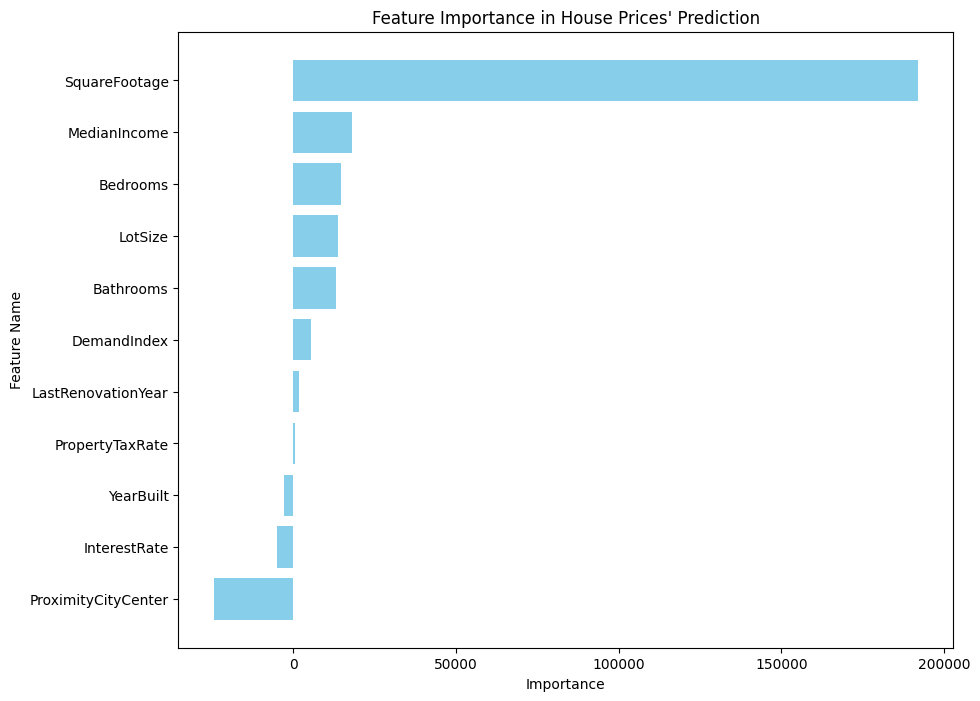

In [35]:
#use a barchart to show your output
plt.figure(figsize=(10,8))

plt.barh(importance_df["Feature"], importance_df["Importance"], color = "skyblue")
# sns.barplot(data = importance_df, x = "Importance", y = "Feature", orient = "h", color = "skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in House Prices' Prediction")
plt.gca().invert_yaxis() #this places the features with the highest importance at the top
plt.show()